#Task 4

Machine Learning internship project provided by the company Cognifyz.

**Gihub: ** 

**May-June 2024**

**Objective:** Perform a geographical analysis of the
restaurants in the dataset.

**Steps:**

* Explore the latitude and longitude coordinates of
the restaurants and visualize their distribution on a
map.
* Group the restaurants by city or locality and
analyze the concentration of restaurants in
different areas.
* Calculate statistics such as the average ratings,
cuisines, or price ranges by city or locality.
* Identify any interesting insights or patterns related
to the locations of the restaurants.

### Libraries and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd

In [2]:
#load dataframe
df = pd.read_csv('Dataset.csv')

### Distribution of restaurants on the map (longitude and latitude)

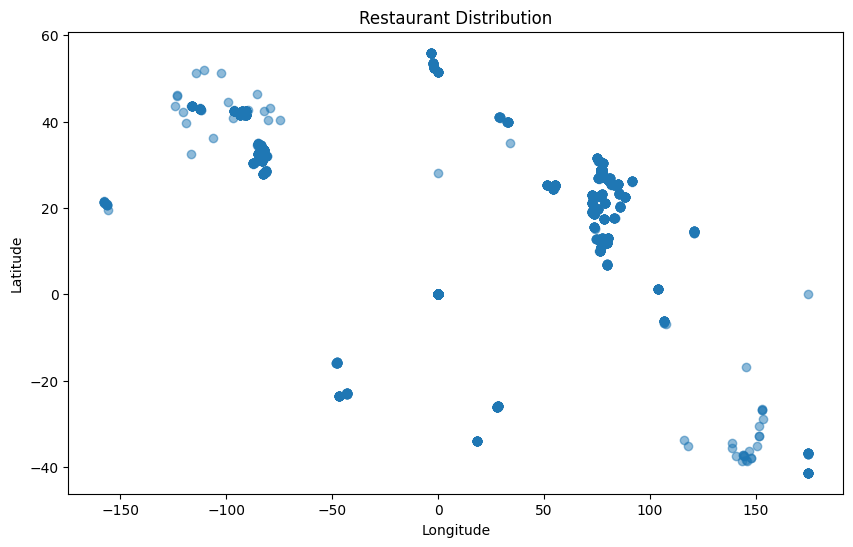

In [3]:
# Display scatter plot of restaurants in the co-ordinates
if "Latitude" and "Longitude" in df.columns:
  plt.figure(figsize=(10, 6))
  plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5)
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  plt.title("Restaurant Distribution")
  plt.show()
else:
  print("Latitude and longitude columns not found.")

### Analysing the concentration of restaurants by city/location

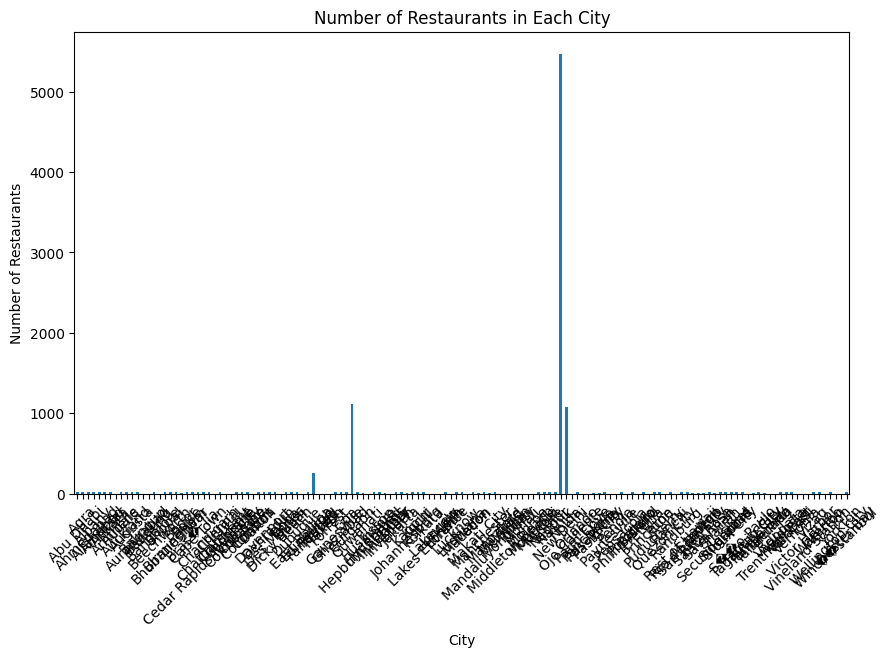

In [4]:
grouped_by_city = df.groupby('City')
restaurant_counts = grouped_by_city.size()

# Plotting the restaurant counts by city
restaurant_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Restaurants in Each City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


In [5]:
#the above graph is too dense to be visible.
#inspect number of cities
df['City'].nunique()

141

In [6]:
df1 = df.copy()

In [7]:
# There are 141 cities in the dataset. It will be difficult to analyse all of them.
# We will filter out top 20 cities with highest number of restaurants.
city_count = dict(df1['City'].value_counts().sort_values(ascending=False)[:20])
print(city_count)

{'New Delhi': 5473, 'Gurgaon': 1118, 'Noida': 1080, 'Faridabad': 251, 'Ghaziabad': 25, 'Bhubaneshwar': 21, 'Amritsar': 21, 'Ahmedabad': 21, 'Guwahati': 21, 'Lucknow': 21, 'Cape Town': 20, 'Bras�_lia': 20, 'Rio de Janeiro': 20, 'S��o Paulo': 20, 'Albany': 20, 'Athens': 20, 'Augusta': 20, 'Manchester': 20, 'Boise': 20, 'Cedar Rapids/Iowa City': 20}


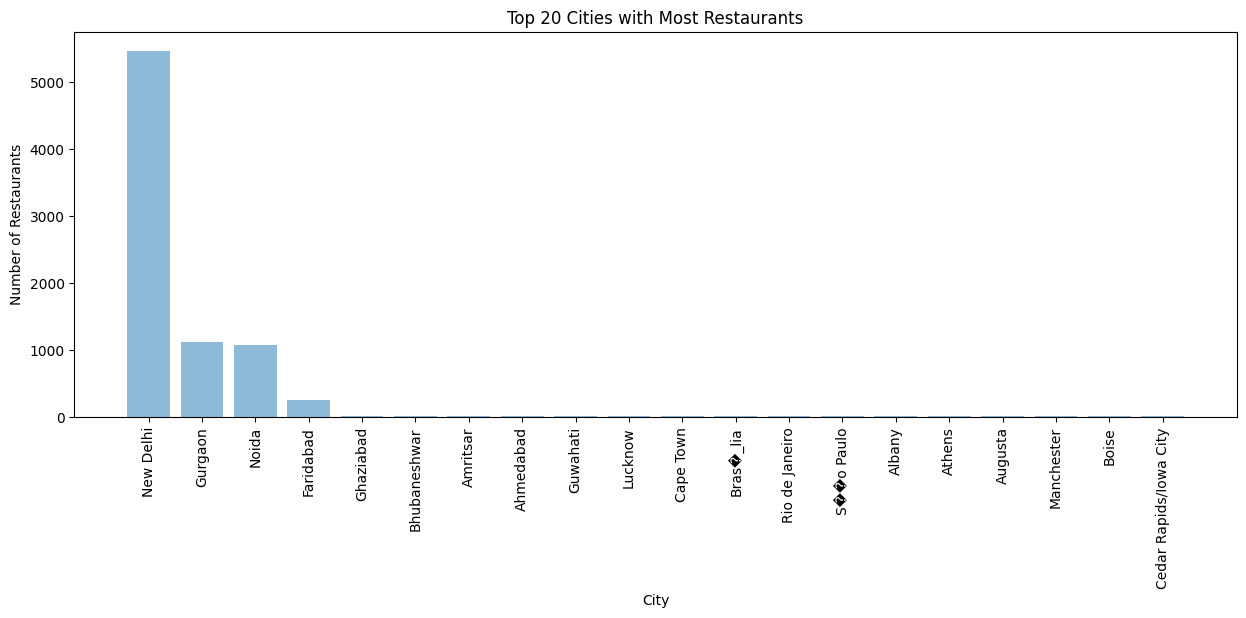

In [8]:
#plot a bar chart of the top 20 cities with the most restaurants
cities = list(city_count.keys())
counts = list(city_count.values())
y_pos = np.arange(len(cities))

plt.figure(figsize=(15, 5))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, cities, rotation=90)
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Top 20 Cities with Most Restaurants")
plt.show()

In [9]:
locality_count = dict(df1['Address'].value_counts().sort_values(ascending=False)[:20])
print(locality_count)

{'Dilli Haat, INA, New Delhi': 11, 'Sector 41, Noida': 11, 'Greater Kailash (GK) 1, New Delhi': 10, 'The Imperial, Janpath, New Delhi': 9, 'Cyber Hub, DLF Cyber City, Gurgaon': 8, 'Food Court, 3rd Floor, Logix City Centre, Sector 32, Near Sector 34, Noida': 8, 'HUDA Market, Sector 56, Gurgaon': 8, 'Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapuri, New Delhi': 8, 'The Lalit, Barakhamba Avenue, Barakhamba Road, New Delhi': 8, 'Unitech Infospace, Sector 21, Gurgaon': 7, 'DLF Phase 1, Gurgaon': 7, 'The Taj Mahal Hotel, 1, Mansingh Road, New Delhi': 7, 'Main Market, Ghitorni, MG Road, New Delhi': 7, '3rd Floor, DLF Mall of India, Sector 18, Noida': 7, 'Le Meridien, Windsor Place, Janpath, New Delhi': 6, 'DLF Phase 3, Gurgaon': 6, 'Sector 51, Noida': 6, '19, Ansari Road, Ring Road, MGM Club, Daryaganj, New Delhi': 6, 'Sector 56, Gurgaon': 6, 'DLF Phase 4, Gurgaon': 6}


In [10]:
country_count = dict(df1['Country Code'].value_counts().sort_values(ascending=False)[:20])
print(country_count)

{1: 8652, 216: 434, 215: 80, 30: 60, 214: 60, 189: 60, 148: 40, 208: 34, 14: 24, 162: 22, 94: 21, 184: 20, 166: 20, 191: 20, 37: 4}


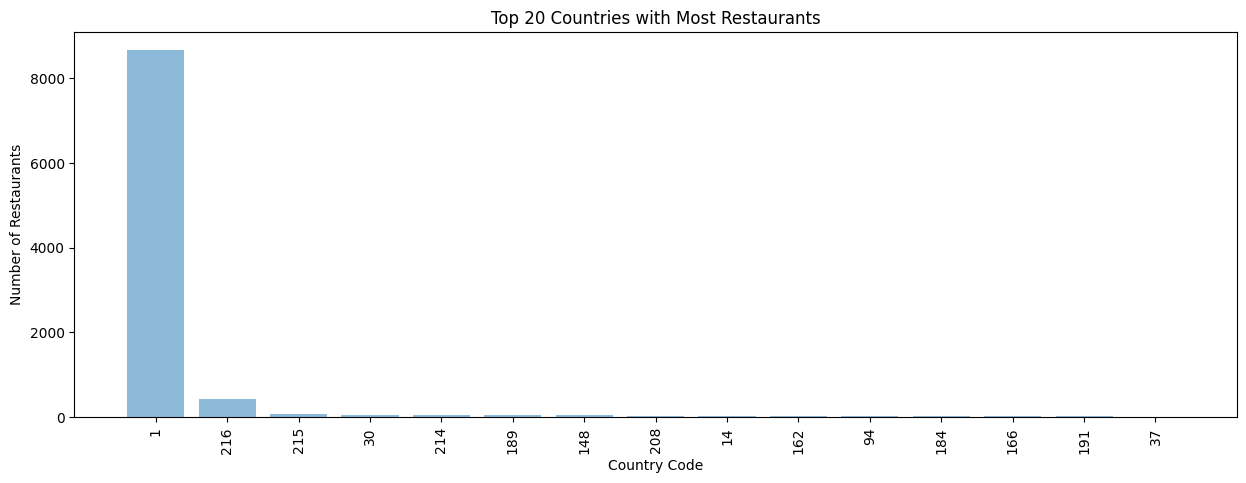

In [11]:
cities = list(country_count.keys())
counts = list(country_count.values())
y_pos = np.arange(len(cities))

plt.figure(figsize=(15, 5))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, cities, rotation=90)
plt.xlabel("Country Code")
plt.ylabel("Number of Restaurants")
plt.title("Top 20 Countries with Most Restaurants")
plt.show()

### Calculating statistics such as the average ratings, cuisines, or price ranges by city or locality

In [12]:
print(city_count)

{'New Delhi': 5473, 'Gurgaon': 1118, 'Noida': 1080, 'Faridabad': 251, 'Ghaziabad': 25, 'Bhubaneshwar': 21, 'Amritsar': 21, 'Ahmedabad': 21, 'Guwahati': 21, 'Lucknow': 21, 'Cape Town': 20, 'Bras�_lia': 20, 'Rio de Janeiro': 20, 'S��o Paulo': 20, 'Albany': 20, 'Athens': 20, 'Augusta': 20, 'Manchester': 20, 'Boise': 20, 'Cedar Rapids/Iowa City': 20}


In [13]:
average_ratings_by_city = {}
for city, count in city_count.items():
  city_df = df[df['City'] == city]
  average_rating = city_df['Aggregate rating'].mean()
  average_ratings_by_city[city] = average_rating

sorted_average_ratings = {k: v for k, v in sorted(average_ratings_by_city.items(), key=lambda item: item[1], reverse=True)}
print("Average Ratings by City:")
for city, average_rating in sorted_average_ratings.items():
  print(f"{city}: {average_rating:.1f}")


Average Ratings by City:
Rio de Janeiro: 4.3
Boise: 4.3
Athens: 4.2
Lucknow: 4.2
Guwahati: 4.2
Cedar Rapids/Iowa City: 4.2
Ahmedabad: 4.2
Augusta: 4.1
Cape Town: 4.1
Manchester: 4.0
Bhubaneshwar: 4.0
Amritsar: 3.7
Albany: 3.6
S��o Paulo: 3.5
Bras�_lia: 3.5
Ghaziabad: 2.9
Gurgaon: 2.7
New Delhi: 2.4
Noida: 2.0
Faridabad: 1.9


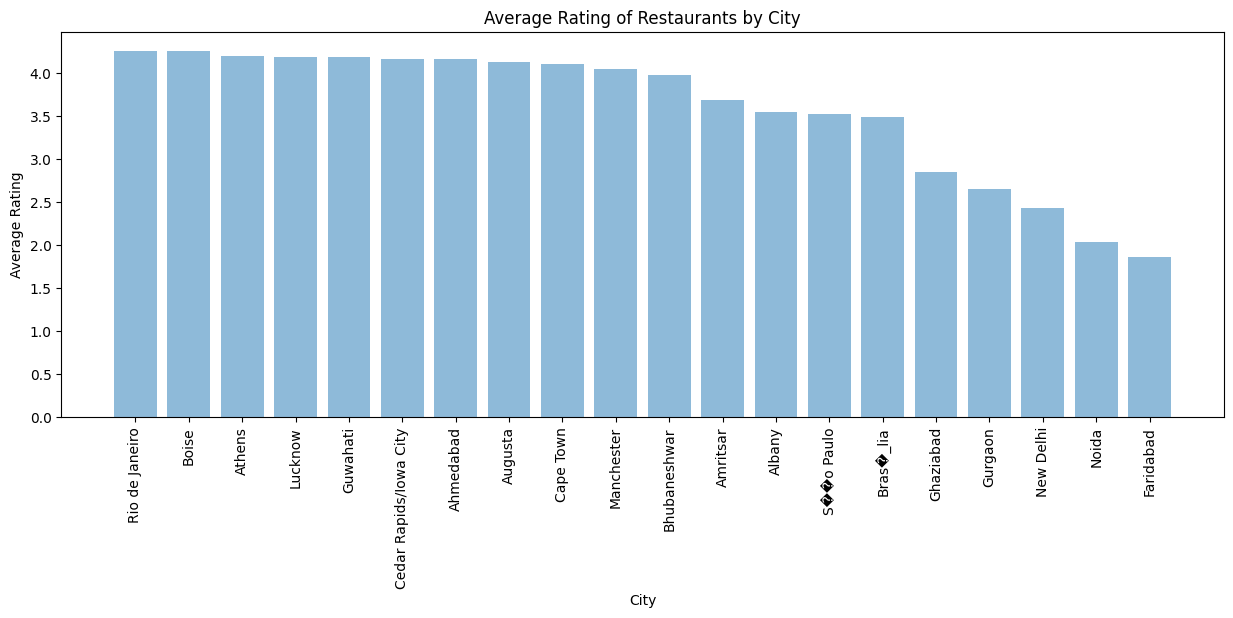

In [14]:
# plot a bar chart of average ratings of top 20 cities
cities = list(sorted_average_ratings.keys())
average_ratings = list(sorted_average_ratings.values())
y_pos = np.arange(len(cities))

plt.figure(figsize=(15, 5))
plt.bar(y_pos, average_ratings, align='center', alpha=0.5)
plt.xticks(y_pos, cities, rotation=90)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Average Rating of Restaurants by City")
plt.show()


In [15]:
# prompt: create a sorted dictionary where key is the cuisine and value is the frequency in the dataset

cuisines = df['Cuisines'].str.split(',').explode().value_counts().sort_values(ascending=False).to_dict()
print(cuisines)

{'North Indian': 2992, ' Chinese': 1880, ' Fast Food': 1314, ' North Indian': 968, 'Chinese': 855, ' Mughlai': 780, 'Fast Food': 672, 'Bakery': 621, 'Cafe': 617, ' Italian': 530, ' Desserts': 503, ' Continental': 501, ' South Indian': 374, ' Street Food': 326, 'American': 278, 'South Indian': 262, 'Mithai': 246, 'Street Food': 236, 'Continental': 235, 'Italian': 234, 'Pizza': 232, 'Mughlai': 215, ' Thai': 205, 'Ice Cream': 178, ' Asian': 156, ' Beverages': 150, 'Desserts': 150, ' Pizza': 149, ' Burger': 135, ' Mithai': 134, ' Seafood': 125, ' Bakery': 124, ' Mexican': 119, 'Burger': 116, ' American': 112, 'Biryani': 112, 'Raw Meats': 110, ' Healthy Food': 94, ' Salad': 91, ' European': 86, ' Cafe': 86, ' Mediterranean': 84, 'Beverages': 79, 'Finger Food': 78, 'Asian': 77, 'Japanese': 72, ' Biryani': 65, ' Japanese': 63, 'Mexican': 62, 'European': 62, ' Sushi': 62, 'Healthy Food': 56, 'Indian': 51, 'Seafood': 49, ' Steak': 49, ' Sandwich': 48, ' Ice Cream': 48, ' Lebanese': 44, ' Finger

In [16]:
average_price_by_city = {}
for city, count in city_count.items():
  city_df = df[df['City'] == city]
  average_price = city_df['Price range'].mean()
  average_price_by_city[city] = average_price

sorted_average_price = {k: v for k, v in sorted(average_price_by_city.items(), key=lambda item: item[1], reverse=True)}
print("Average Price by City:")
for city, average_price in sorted_average_price.items():
  print(f"{city}: {average_price:.1f}")


Average Price by City:
S��o Paulo: 3.6
Rio de Janeiro: 3.5
Cape Town: 3.2
Bras�_lia: 3.1
Manchester: 2.7
Ahmedabad: 2.6
Lucknow: 2.6
Guwahati: 2.5
Augusta: 2.1
Boise: 2.0
Cedar Rapids/Iowa City: 2.0
Bhubaneshwar: 1.9
Gurgaon: 1.9
Amritsar: 1.8
Ghaziabad: 1.8
Albany: 1.7
New Delhi: 1.6
Noida: 1.6
Athens: 1.6
Faridabad: 1.5


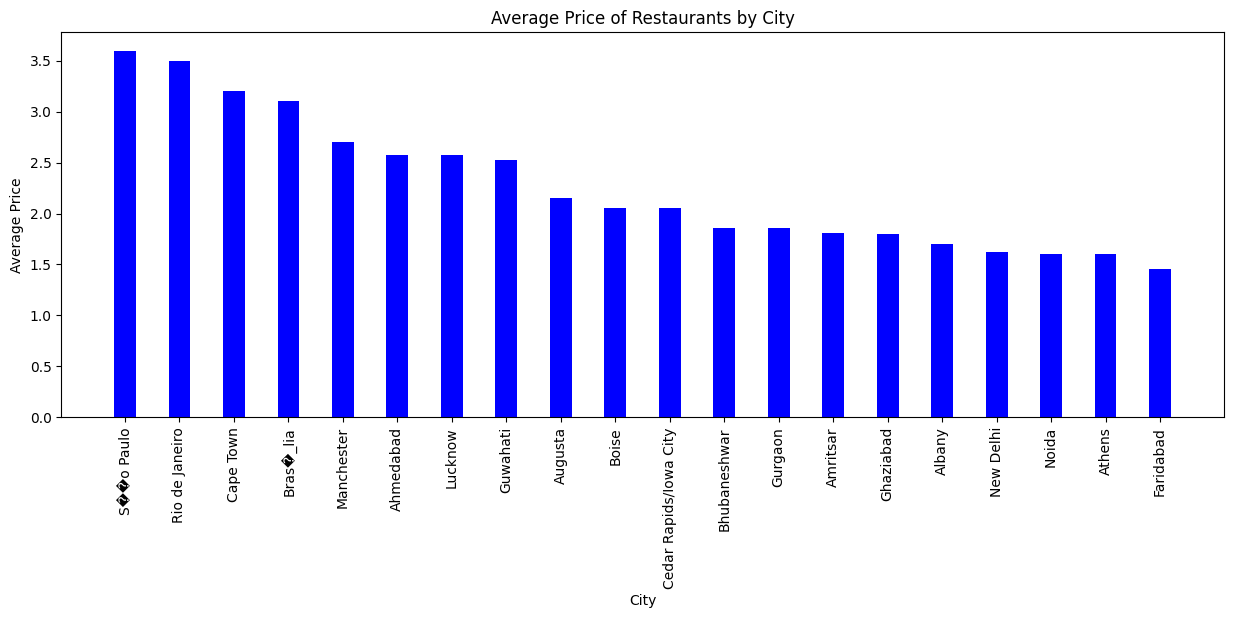

In [17]:
cities = list(sorted_average_price.keys())
average_price = list(sorted_average_price.values())

plt.figure(figsize=(15, 5))
plt.bar(cities, average_price, color='blue', width=0.4)

plt.xlabel("City")
plt.ylabel("Average Price")
plt.title("Average Price of Restaurants by City")

plt.xticks(rotation=90)
plt.show()


### Conclusion and Insights





* Visualized the geospatial distribution of restaurants on the map using their co-ordinates using Folium and Geopanda libraries.
* New Delhi is the city having the highest number of restaurants with a whopping 5473. It is followed by Gurgaon and Noida.
* By locality, Dilli Haat, INA, New Delhi has the most number of restaurants. By Country, country code "1", probably North America tops this list.
* Among top 20 cities with most restaurants, Rio de Janeiro and Boise have the highest average restaurant ratings of 4.3.
* 'North Indian' is the most popular cuisine overall, followed by 'Chinese' and 'Fast Food'.
* Among the top 20 cities with most restaurants, S��o Paulo and
Rio de Janeiro have the most expensive restaurants (average).



